In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [79]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1. Choice: Option 1 Default of Credit Card Clients Dataset.
2. This problem is to predict whether a credit card client will default or not. (binary classification) There are 24 features which is not too many. Our target is `default.payment.next.month` (1 is yes and 0 is no) . All entered data is numerical (even sex, education, marriage and Repayment status which are likely categorical features encoded as numbers.)

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=123)
print(train_df.shape)
print(test_df.shape)

(21000, 25)
(9000, 25)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

#### 1. Exploratory Data Analysis

In [5]:
print(train_df.shape)

(21000, 25)


The training set has 21,000 samples and 25 features. This is generally considered a medium-sized data set, which is okay for most machine learning models.

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


We notice that the ranges for each feature are very different and differ by many orders of magnitude.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

We can see that for all 25 features, of the 21000 entries, all of them are non-null so we don't seem to have any missing values. Furthermore, all of the data in the data set are of a numerical datatype.

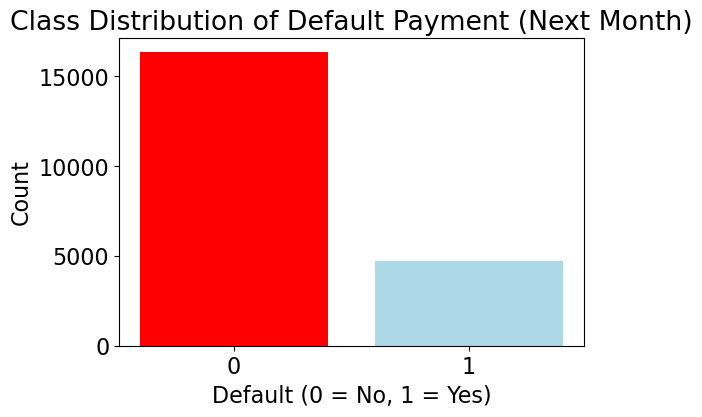

In [8]:
# Bar graph of class distribution of default payment (next month)
class_distribution = train_df['default.payment.next.month'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values, color=['red', 'lightblue'])
plt.title('Class Distribution of Default Payment (Next Month)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1]) 
plt.show()

We can see clearly that there is a class imbalance. There are significantly more instances of no (0) compared to yes (1).

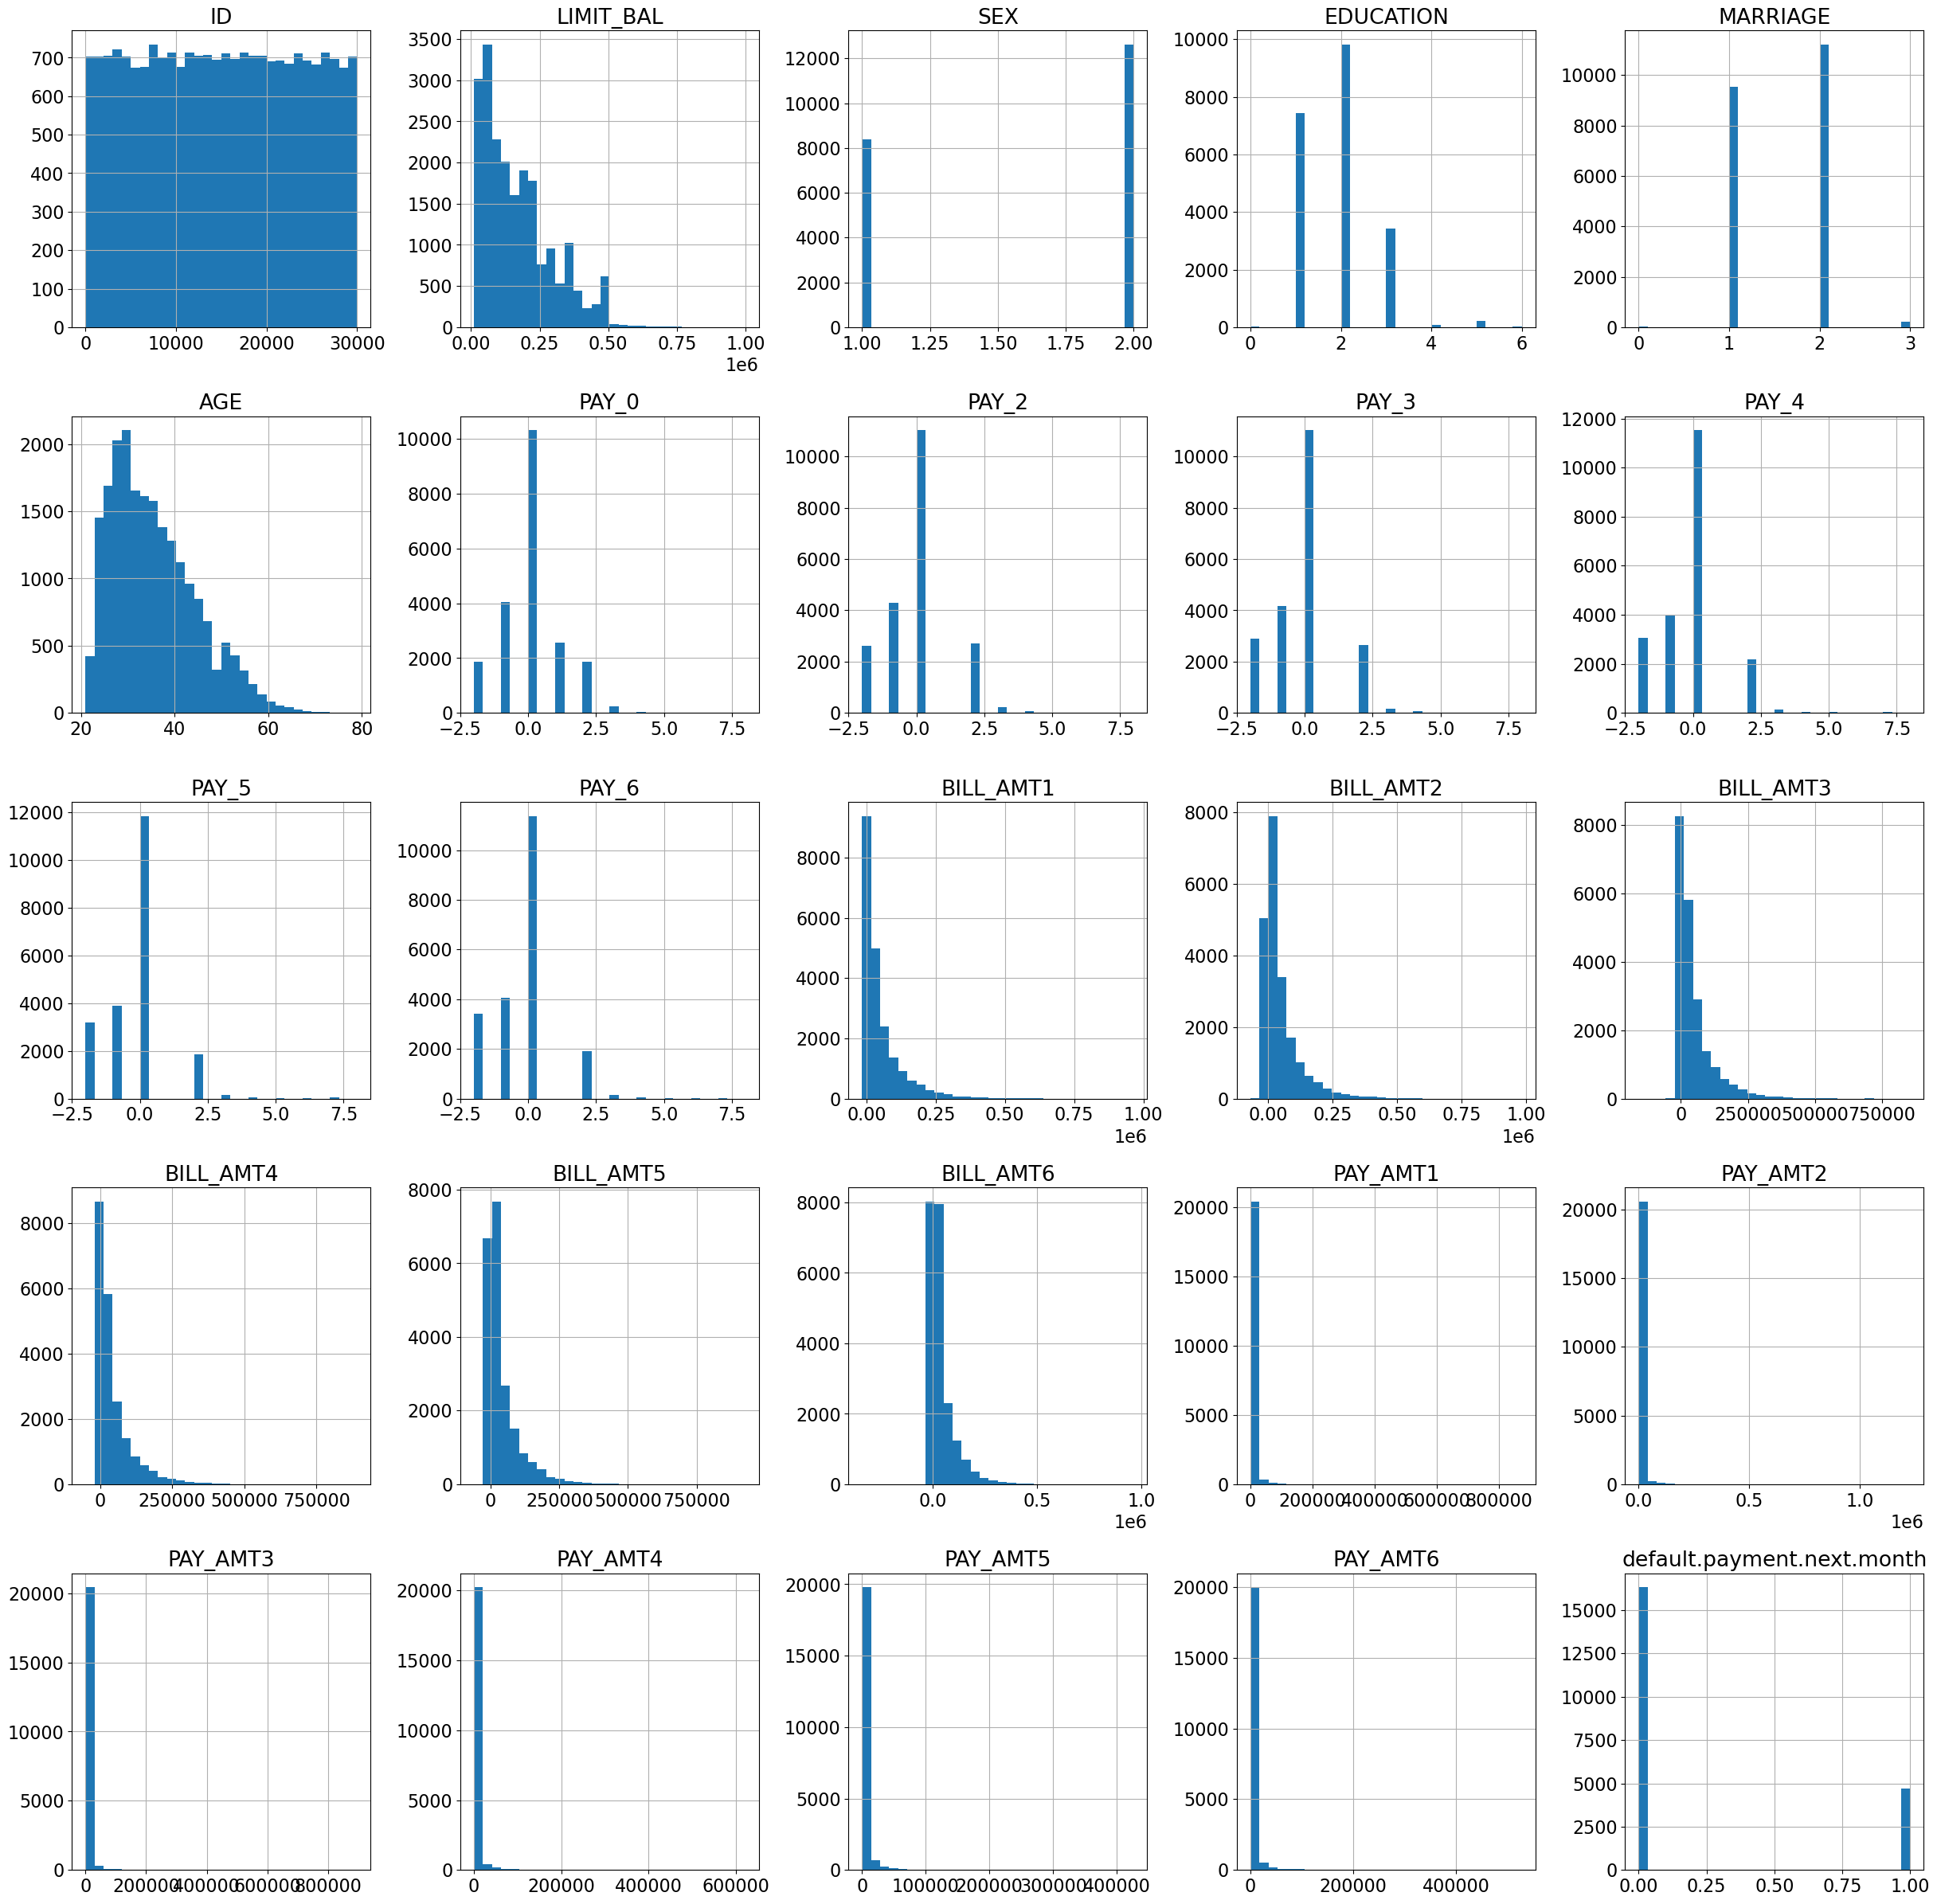

In [9]:
# Creates a histogram that shows the frequency distribution for each numerical feature in the dataset
train_df.hist(bins=30,figsize=(30, 30))
plt.show(block=False)

there are some outliers for feature Pay_#

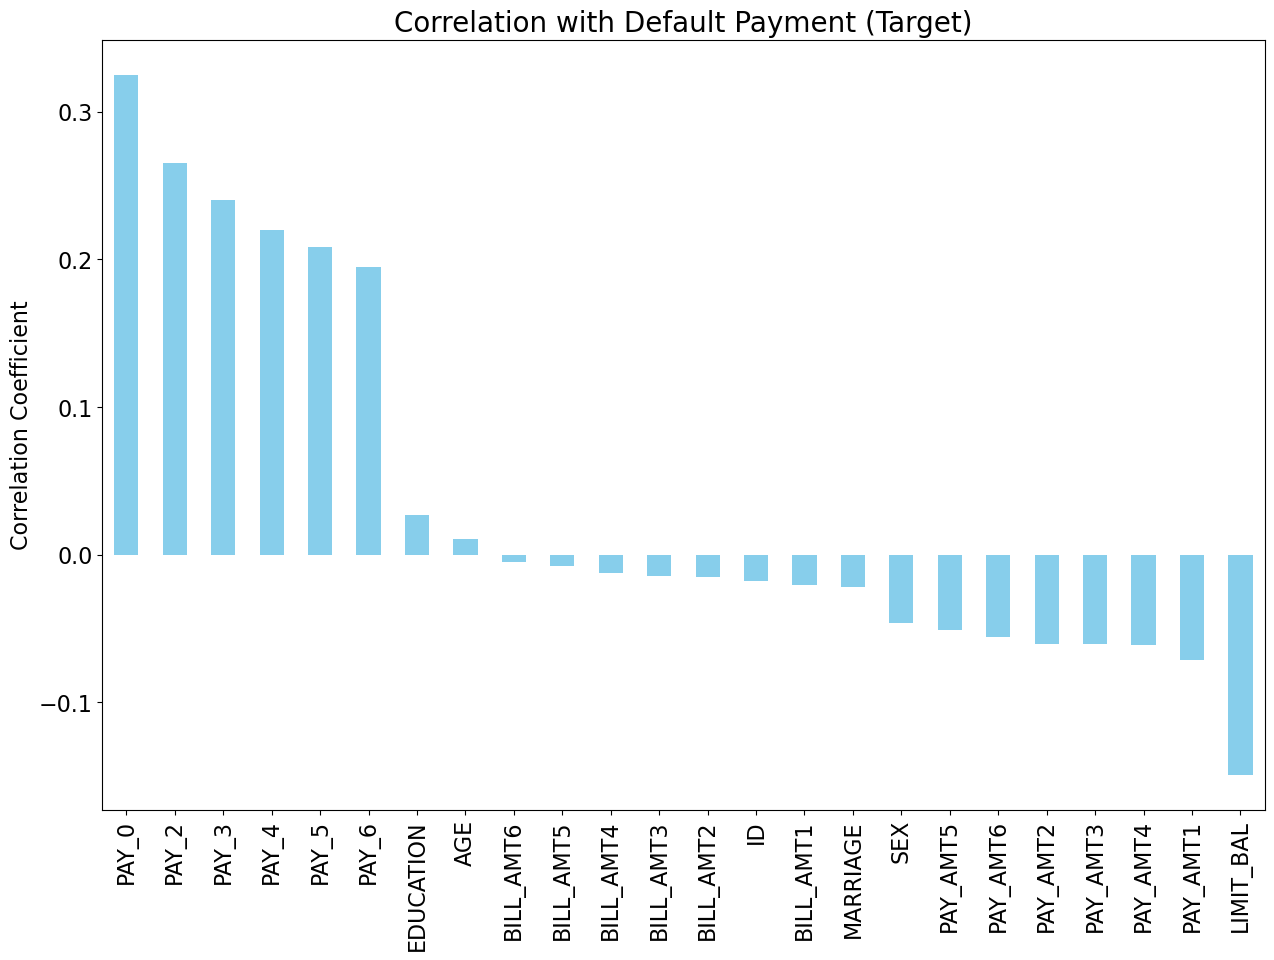

In [10]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(15,10))
correlation_matrix['default.payment.next.month'].sort_values(ascending=False).drop('default.payment.next.month').plot(kind='bar', color='skyblue')
plt.title('Correlation with Default Payment (Target)', fontsize=20)
plt.ylabel('Correlation Coefficient', fontsize=16)
plt.show()

This bar plot shows the correlation between the target variable (default.payment.next.month) and other features. Features with higher positive or negative correlations have a stronger relationship with the likelihood of default.

<!-- END QUESTION -->

<br><br>

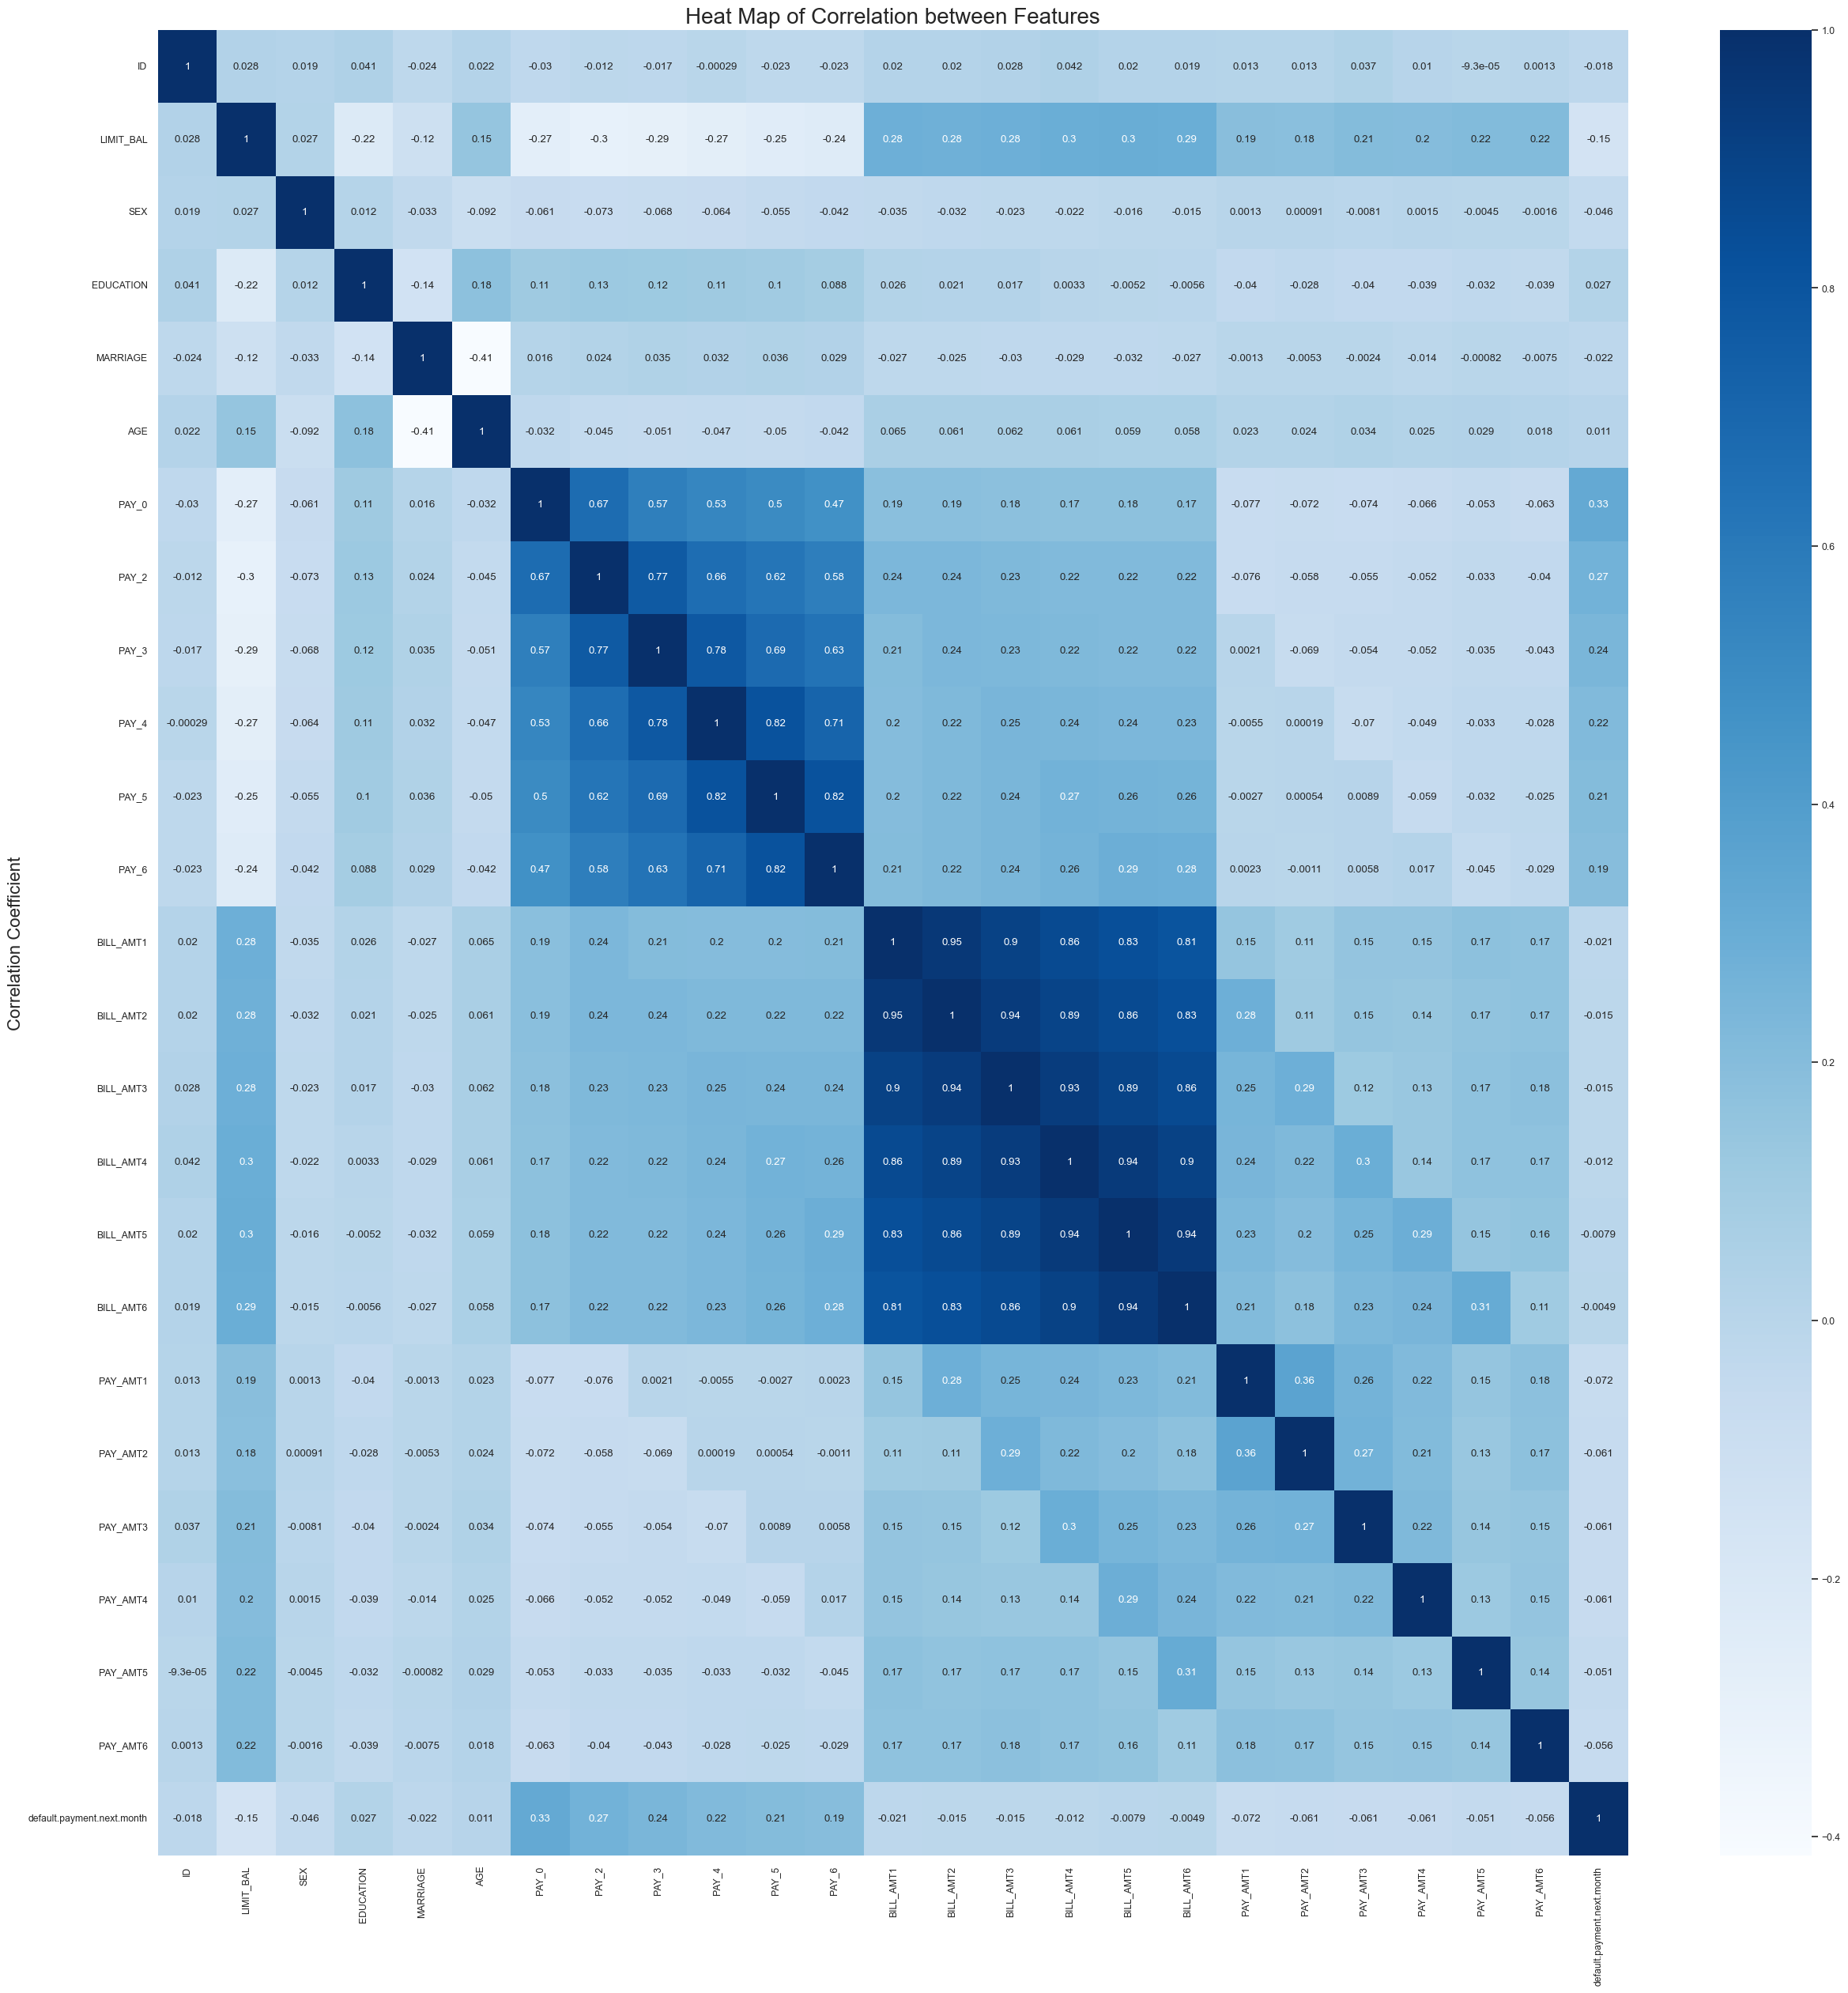

In [11]:
# adapted from lecture 13; heat map of correlation between features
correlation_matrix = train_df.corr()

plt.figure(figsize=(30, 30))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues);
plt.title('Heat Map of Correlation between Features', fontsize=20)
plt.ylabel('Correlation Coefficient', fontsize=16)
plt.show()

The heat map results show that the PAY_(number) features have at least a 0.5 correlation with each other, while the BILL_AMT(number) features also exhibit a high correlation of 0.8 or more with each other.

#### 3. Initial Observation Summary
From the exploratory data analysis, we've determined that: 
- We have a moderately sized data set with 25 features (24 if not including target) and 21000 samples.
- It appears there are no missing values in the dataset, and all the data is numerical.
- The numerical data differ greatly in range and magnitude, so we must scale it.
- There is a notable class imbalance in the target feature, so we must choose an appropriate metric to account for that.
- We can see some data points that are different from the majority of other observations in the dataset.
- From Correlation with Default Payment, we can get some rough idea about the positive/negative relationship with target value; pay_# tends to have positive correlation, while pay_amt# has negative.
- The heat map results show that the PAY_(number) features have at least a 0.5 correlation with each other, while the BILL_AMT(number) features also exhibit a high correlation of 0.8 or more with each other.

#### 4. Appropriate Metric
Due to class imbalance (Yes is considerably less frequent than No), we chose recall with Macro-Averaging because recall focuses on identifying the minority class (Yes for default), ensuring that defaults are not missed. Macro-Averaging treats all classes equally, giving the minority class equal importance, which is crucial in detecting defaults accurately in an imbalanced dataset.

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

In [12]:
# separating target in train and test
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)


In [131]:
# new features
X_train['TOTAL_PAY_AMT'] = X_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

X_train['TOTAL_BILL_AMT'] = X_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

X_train['UNPAID_TOTAL'] = X_train['TOTAL_BILL_AMT'] - X_train['TOTAL_PAY_AMT']

X_train['CREDIT_USAGE_RATIO'] = X_train['TOTAL_BILL_AMT'] / X_train['LIMIT_BAL']

X_test['TOTAL_PAY_AMT'] = X_test[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

X_test['TOTAL_BILL_AMT'] = X_test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

X_test['UNPAID_TOTAL'] = X_test['TOTAL_BILL_AMT'] - X_test['TOTAL_PAY_AMT']

X_test['CREDIT_USAGE_RATIO'] = X_test['TOTAL_BILL_AMT'] / X_test['LIMIT_BAL']

X_train


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_PAY_AMT,TOTAL_BILL_AMT,UNPAID_TOTAL,CREDIT_USAGE_RATIO
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,21031.0,119213.0,98182.0,0.372541
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,287726.0,528826.0,241100.0,1.201877
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-108.0,-108.0,-0.000675
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,20136.0,530682.0,510546.0,4.422350
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,6600.0,205081.0,198481.0,4.101620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,8646.0,86869.0,78223.0,0.228603
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,0.0,0.0,2580.0,0.0,6941.0,0.0,9521.0,12101.0,2580.0,0.033614
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,2002.0,2000.0,1530.0,1000.0,327.0,329.0,7188.0,199605.0,192417.0,3.992100
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,2000.0,2000.0,2000.0,1765.0,331.0,0.0,8096.0,163214.0,155118.0,5.440467


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
# separating features
numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "TOTAL_PAY_AMT",
    "TOTAL_BILL_AMT",
    "UNPAID_TOTAL",
    "CREDIT_USAGE_RATIO"
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"
drop_features = ["ID"]

In [15]:
# make preprocessor
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("drop", drop_features),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [16]:
from sklearn.metrics import make_scorer, recall_score

# make scoring metric using recall with macro-average
scoring_metric = make_scorer(recall_score, average="macro")

In [17]:
# from Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}

In [18]:
dummy = DummyClassifier(strategy="stratified",  random_state=123)

dummy.fit(X_train, y_train)

results["dummy"] = mean_std_cross_val_scores(dummy, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)

df_dummy = pd.DataFrame(results)
df_dummy

,dummy
fit_time,0.001 (+/- 0.000)
score_time,0.001 (+/- 0.000)
test_score,0.505 (+/- 0.005)
train_score,0.504 (+/- 0.006)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

#### 1.

In [19]:
# code from lecture 9
# make pipeline
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(class_weight="balanced", max_iter=1000)
)

# add to dataframe
results["logistic reg"] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)
df_lr = pd.DataFrame(results)
df_lr

,dummy,logistic reg
fit_time,0.001 (+/- 0.000),0.040 (+/- 0.004)
score_time,0.001 (+/- 0.000),0.003 (+/- 0.000)
test_score,0.505 (+/- 0.005),0.673 (+/- 0.009)
train_score,0.504 (+/- 0.006),0.674 (+/- 0.002)


#### 2.

In [20]:
# Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.

# create grid
param_grid = {
    'logisticregression__C': loguniform(1e-4, 1e4),
    'logisticregression__max_iter': [100, 200, 300],
}

random_search = RandomizedSearchCV(
                pipe_lr,                                    
                param_distributions = param_grid, 
                n_iter=30, 
                n_jobs=-1, 
                return_train_score=True,
                scoring=scoring_metric,
                random_state=123)

random_search.fit(X_train, y_train)

# code from lecture8
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "param_logisticregression__C",
        "param_logisticregression__max_iter",
        "mean_test_score",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

print("Best hyperparameters found:")
print(random_search.best_params_)

print("Best cross-validation score:")
print(f"{random_search.best_score_:.3f}")

/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best hyperparameters found:
{'logisticregression__C': 0.02411259667748044, 'logisticregression__max_iter': 200}
Best cross-validation score:
0.675


#### 3. 

In [21]:
best_estimator = random_search.best_estimator_
results["tuned logistic reg"] = mean_std_cross_val_scores(best_estimator, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)

df_lr_ = pd.DataFrame(results)
df_lr_

,dummy,logistic reg,tuned logistic reg
fit_time,0.001 (+/- 0.000),0.040 (+/- 0.004),0.028 (+/- 0.001)
score_time,0.001 (+/- 0.000),0.003 (+/- 0.000),0.003 (+/- 0.000)
test_score,0.505 (+/- 0.005),0.673 (+/- 0.009),0.675 (+/- 0.009)
train_score,0.504 (+/- 0.006),0.674 (+/- 0.002),0.675 (+/- 0.002)


#### 4. Summary
We found that:

Logistic regression showed better performance compared to the dummy classifier.
Hyperparameter turning does not improve the validation score very much (from 0.673 to 0.675).
The training and validation scores are quite similar. Both models appear to be underfitting.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

#### 1. Trying K Nearest Neighbours, SVM RBF, and Light GBM

In [22]:
# code adapted from lecture 13

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm.sklearn import LGBMClassifier

classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM RBF": SVC(),
    "LightGBM": LGBMClassifier(random_state=123, verbose=-1)
}

for (name, model) in classifiers.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, scoring = scoring_metric)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.505 (+/- 0.005),0.504 (+/- 0.006)
logistic reg,0.040 (+/- 0.004),0.003 (+/- 0.000),0.673 (+/- 0.009),0.674 (+/- 0.002)
tuned logistic reg,0.028 (+/- 0.001),0.003 (+/- 0.000),0.675 (+/- 0.009),0.675 (+/- 0.002)
KNN,0.008 (+/- 0.000),0.053 (+/- 0.009),0.639 (+/- 0.003),0.710 (+/- 0.002)
SVM RBF,3.221 (+/- 0.014),1.416 (+/- 0.067),0.648 (+/- 0.006),0.657 (+/- 0.002)
LightGBM,0.252 (+/- 0.003),0.007 (+/- 0.000),0.660 (+/- 0.005),0.716 (+/- 0.004)


#### 2. Summary
On average:
- It appears the models are underfitting as they all have fairly low test scores.
- Light GBM performed the best, and KNN the worst.
- KNN also has the fastest fit time while LGBM has the fastest score time. SVM RBF is the slowest for both fitting and scoring.
- So far, none of the other models we've tried have had better performance compared to the linear regression model (0.660, 0.648, 0.639 < 0.675).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [46]:
from sklearn.feature_selection import RFECV
# code from lecture 9
pipe_lr_rfe = make_pipeline(
    preprocessor,
    RFECV(LogisticRegression(class_weight="balanced", max_iter=1000), cv=5, scoring=scoring_metric)
)

In [53]:
pipe_lr_rfe.fit(X_train, y_train)


# Access the RFECV object
rfecv = pipe_lr_rfe.named_steps['rfecv']

Optimal number of features: 4


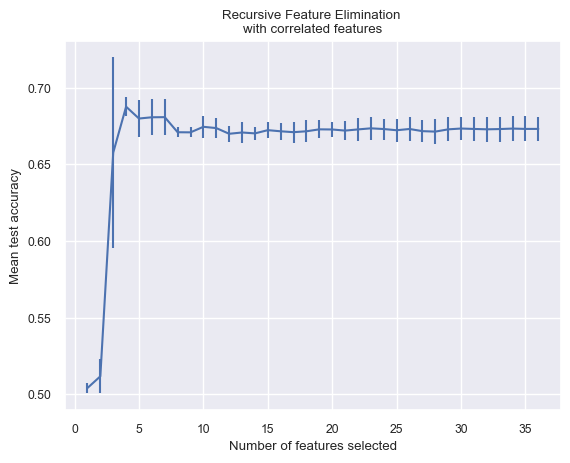

In [54]:
# code from https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
print(f"Optimal number of features: {rfecv.n_features_}")

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [61]:
# code adapted from lecture 13

classifiers = {
    "logistic reg": LogisticRegression(class_weight="balanced", max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM RBF": SVC(),
    "LightGBM": LGBMClassifier(random_state=123, verbose=-1)
}

for (name, model) in classifiers.items():
    pipe = make_pipeline(preprocessor, 
                         RFECV(LogisticRegression(class_weight="balanced", max_iter=1000), cv=5, scoring=scoring_metric),
                         model)
    results["rfecv " + name] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, scoring = scoring_metric)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.505 (+/- 0.005),0.504 (+/- 0.006)
logistic reg,0.040 (+/- 0.004),0.003 (+/- 0.000),0.673 (+/- 0.009),0.674 (+/- 0.002)
tuned logistic reg,0.028 (+/- 0.001),0.003 (+/- 0.000),0.675 (+/- 0.009),0.675 (+/- 0.002)
KNN,0.008 (+/- 0.000),0.053 (+/- 0.009),0.639 (+/- 0.003),0.710 (+/- 0.002)
SVM RBF,3.221 (+/- 0.014),1.416 (+/- 0.067),0.648 (+/- 0.006),0.657 (+/- 0.002)
LightGBM,0.252 (+/- 0.003),0.007 (+/- 0.000),0.660 (+/- 0.005),0.716 (+/- 0.004)
rfecv logistic reg,3.526 (+/- 0.104),0.004 (+/- 0.001),0.684 (+/- 0.011),0.683 (+/- 0.006)
tuned rfecv logistic reg,1.242 (+/- 0.047),0.003 (+/- 0.000),0.690 (+/- 0.010),0.690 (+/- 0.002)
rfecvlogistic reg,3.523 (+/- 0.151),0.003 (+/- 0.000),0.684 (+/- 0.011),0.683 (+/- 0.006)
rfecvKNN,3.529 (+/- 0.139),0.108 (+/- 0.038),0.638 (+/- 0.018),0.656 (+/- 0.030)


In [55]:
# scores_lr_rfe = cross_validate(pipe_lr_rfe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)
# df_lr_rfe = pd.DataFrame(scores_lr_rfe)
# mean_scores = df_lr_rfe.mean()
# std_scores = df_lr_rfe.std()

# print(df_lr_rfe)

# for metric in mean_scores.index:
#     print(f"{metric}\t{mean_scores[metric]:.3f} (+/- {std_scores[metric]:.3f})")

results["rfecv logistic reg"] = mean_std_cross_val_scores(
    pipe_lr_rfe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric
)
df_lr_rfe = pd.DataFrame(results)
df_lr_rfe

,dummy,logistic reg,tuned logistic reg,KNN,SVM RBF,LightGBM,rfecv logistic reg
fit_time,0.001 (+/- 0.000),0.040 (+/- 0.004),0.028 (+/- 0.001),0.008 (+/- 0.000),3.221 (+/- 0.014),0.252 (+/- 0.003),3.526 (+/- 0.104)
score_time,0.001 (+/- 0.000),0.003 (+/- 0.000),0.003 (+/- 0.000),0.053 (+/- 0.009),1.416 (+/- 0.067),0.007 (+/- 0.000),0.004 (+/- 0.001)
test_score,0.505 (+/- 0.005),0.673 (+/- 0.009),0.675 (+/- 0.009),0.639 (+/- 0.003),0.648 (+/- 0.006),0.660 (+/- 0.005),0.684 (+/- 0.011)
train_score,0.504 (+/- 0.006),0.674 (+/- 0.002),0.675 (+/- 0.002),0.710 (+/- 0.002),0.657 (+/- 0.002),0.716 (+/- 0.004),0.683 (+/- 0.006)


In [25]:
# merged_df = pd.concat([df_dummy.add_suffix('_dummy'), df_lr.add_suffix('_lr'), df_lr_rfe.add_suffix('_lr_rfe')], axis=1)
# merged_df

In [59]:
best_estimator = random_search.best_estimator_
# scores_lr_rfe_tuned = cross_validate(best_estimator, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)
# df_lr_rfe_tuned = pd.DataFrame(scores_lr_rfe_tuned)
# mean_scores = df_lr_rfe_tuned.mean()
# std_scores = df_lr_rfe_tuned.std()

# print(df_lr_rfe_tuned)

# for metric in mean_scores.index:
#     print(f"{metric}\t{mean_scores[metric]:.3f} (+/- {std_scores[metric]:.3f})")

# merged_df = pd.concat([df_dummy.add_suffix('_dummy'), df_lr.add_suffix('_lr'), df_lr_tuned.add_suffix('_lr_tuned'), df_lr_rfe.add_suffix('_lr_rfe'),  df_lr_rfe_tuned.add_suffix('_lr_rfe_tuned')], axis=1)
# merged_df

results["tuned rfecv logistic reg"] = mean_std_cross_val_scores(
    best_estimator,
    X_train,
    y_train,
    cv=5,
    return_train_score=True,
    scoring=scoring_metric,
)

df_lr_rfe_tuned = pd.DataFrame(results)
df_lr_rfe_tuned

,dummy,logistic reg,tuned logistic reg,KNN,SVM RBF,LightGBM,rfecv logistic reg,tuned rfecv logistic reg
fit_time,0.001 (+/- 0.000),0.040 (+/- 0.004),0.028 (+/- 0.001),0.008 (+/- 0.000),3.221 (+/- 0.014),0.252 (+/- 0.003),3.526 (+/- 0.104),1.242 (+/- 0.047)
score_time,0.001 (+/- 0.000),0.003 (+/- 0.000),0.003 (+/- 0.000),0.053 (+/- 0.009),1.416 (+/- 0.067),0.007 (+/- 0.000),0.004 (+/- 0.001),0.003 (+/- 0.000)
test_score,0.505 (+/- 0.005),0.673 (+/- 0.009),0.675 (+/- 0.009),0.639 (+/- 0.003),0.648 (+/- 0.006),0.660 (+/- 0.005),0.684 (+/- 0.011),0.690 (+/- 0.010)
train_score,0.504 (+/- 0.006),0.674 (+/- 0.002),0.675 (+/- 0.002),0.710 (+/- 0.002),0.657 (+/- 0.002),0.716 (+/- 0.004),0.683 (+/- 0.006),0.690 (+/- 0.002)


In [110]:
# Define the pipeline with named steps
pipe_lr_rfe_extract_features = Pipeline([
    ("preprocessor", preprocessor),  # Preprocessor step named explicitly
    ("rfecv", RFECV(LogisticRegression(class_weight="balanced", max_iter=1000), cv=5))
])

# Fit the model on the entire dataset to determine the final selected features
pipe_lr_rfe_extract_features.fit(X_train, y_train)

# Access the RFECV object within the pipeline
rfe_cv = pipe_lr_rfe_extract_features.named_steps['rfecv']

# Get feature names after transformation
transformed_feature_names = pipe_lr_rfe_extract_features.named_steps['preprocessor'].get_feature_names_out()

# Get the selected features as a boolean mask (True for selected features)
selected_features = rfe_cv.support_

# Retrieve the names of the selected features using the boolean mask
selected_feature_names = transformed_feature_names[selected_features]

print("\nSelected features after cross-validation:")
print(selected_feature_names)


Selected features after cross-validation:
['standardscaler__PAY_0' 'onehotencoder-2__EDUCATION_4'
 'onehotencoder-2__EDUCATION_5' 'onehotencoder-2__MARRIAGE_0']


In [111]:
transformed_feature_names

array(['standardscaler__LIMIT_BAL', 'standardscaler__AGE',
       'standardscaler__PAY_0', 'standardscaler__PAY_2',
       'standardscaler__PAY_3', 'standardscaler__PAY_4',
       'standardscaler__PAY_5', 'standardscaler__PAY_6',
       'standardscaler__BILL_AMT1', 'standardscaler__BILL_AMT2',
       'standardscaler__BILL_AMT3', 'standardscaler__BILL_AMT4',
       'standardscaler__BILL_AMT5', 'standardscaler__BILL_AMT6',
       'standardscaler__PAY_AMT1', 'standardscaler__PAY_AMT2',
       'standardscaler__PAY_AMT3', 'standardscaler__PAY_AMT4',
       'standardscaler__PAY_AMT5', 'standardscaler__PAY_AMT6',
       'standardscaler__TOTAL_PAY_AMT', 'standardscaler__TOTAL_BILL_AMT',
       'standardscaler__UNPAID_TOTAL',
       'standardscaler__CREDIT_USAGE_RATIO', 'onehotencoder-1__SEX_2',
       'onehotencoder-2__EDUCATION_0', 'onehotencoder-2__EDUCATION_1',
       'onehotencoder-2__EDUCATION_2', 'onehotencoder-2__EDUCATION_3',
       'onehotencoder-2__EDUCATION_4', 'onehotencoder-2__EDU

After performing feature selection with RFECV, we found:
- The selected features after cross-validation are:  `['standardscaler__PAY_0' 'onehotencoder-2__EDUCATION_4' 'onehotencoder-2__EDUCATION_5'` and  `'onehotencoder-2__MARRIAGE_0']`.
- The logistic regression model has a slightly improved score; comparing test_score_lr with test_score_lr_rfe, the lr_rfe model has a slightly higher test score (0.675 -> 0.684).
-  The other models decrease in accuracy after using feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

#### Logistic Regression

In [58]:
# Carry out hyperparameter tuning with new pipeline for logistic regression

param_grid = {
    'rfecv__estimator__C': loguniform(1e-4, 1e4),
    'rfecv__estimator__max_iter': [100, 200, 300],
}

random_search = RandomizedSearchCV(
                pipe_lr_rfe,                                    
                param_distributions = param_grid, 
                n_iter=10, # reduce # of iteration 
                n_jobs=-1, 
                return_train_score=True,
                scoring=scoring_metric,
                random_state=123)

random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

print("Best cross-validation score:")
print(f"{random_search.best_score_:.3f}")

# code from lecture8
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "param_rfecv__estimator__C",
        "param_rfecv__estimator__max_iter",
        "mean_test_score",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T


Best hyperparameters found:
{'rfecv__estimator__C': 0.0003002086301848454, 'rfecv__estimator__max_iter': 100}
Best cross-validation score:
0.690


rank_test_score,1,2,2,4,4,6,6,8,9,10
mean_test_score,0.690177,0.688120,0.688120,0.688059,0.688059,0.686452,0.686452,0.683762,0.681400,0.679635
std_test_score,0.008647,0.006310,0.006310,0.006345,0.006345,0.007514,0.007514,0.011053,0.009558,0.009566
param_rfecv__estimator__C,0.000300,0.267773,0.242578,0.193818,0.161488,2.573464,5.639222,0.703810,67.982583,37.303835
param_rfecv__estimator__max_iter,100.000000,300.000000,300.000000,200.000000,100.000000,300.000000,200.000000,200.000000,300.000000,300.000000
mean_test_score,0.690177,0.688120,0.688120,0.688059,0.688059,0.686452,0.686452,0.683762,0.681400,0.679635
mean_fit_time,2.985836,7.515706,8.158964,8.078153,7.731841,8.667007,6.597829,8.371613,9.636686,9.088652


<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

#### KNN

mean_train_score    0.998895
mean_cv_score       0.640723
std_cv_score        0.004110
std_train_score     0.002809
dtype: float64

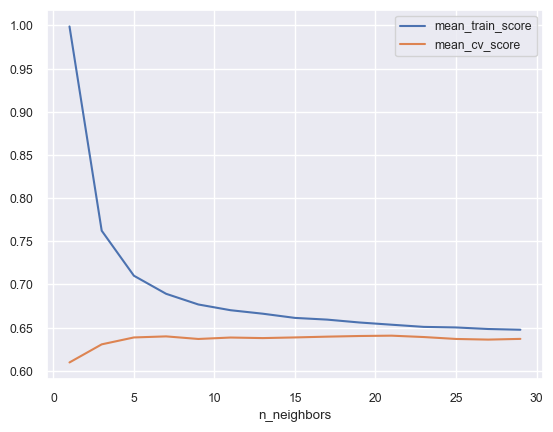

In [63]:
# Hyperparameter optimization for KNN

n_neighbors = np.arange(1, 30, 2).tolist()

results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}

for k in n_neighbors:
    pipe_knn = make_pipeline(preprocessor, 
                             KNeighborsClassifier(n_neighbors=k)
                            )
    scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric)
    results_dict["n_neighbors"].append(k)
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("n_neighbors")
results_df[["mean_train_score", "mean_cv_score"]].plot();
results_df

In [65]:
best_n_neighbours = results_df.idxmax()["mean_cv_score"]
best_n_neighbours

21

In [71]:
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=best_n_neighbours))
results["tuned KNN"] = mean_std_cross_val_scores(pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric)
df_knn_tuned = pd.DataFrame(results)
df_knn_tuned

,dummy,logistic reg,tuned logistic reg,KNN,SVM RBF,LightGBM,rfecv logistic reg,tuned rfecv logistic reg,rfecvlogistic reg,rfecvKNN,rfecvSVM RBF,rfecvLightGBM,tuned KNN
fit_time,0.001 (+/- 0.000),0.040 (+/- 0.004),0.028 (+/- 0.001),0.008 (+/- 0.000),3.221 (+/- 0.014),0.252 (+/- 0.003),3.526 (+/- 0.104),1.242 (+/- 0.047),3.523 (+/- 0.151),3.529 (+/- 0.139),5.238 (+/- 0.456),4.018 (+/- 0.308),0.012 (+/- 0.009)
score_time,0.001 (+/- 0.000),0.003 (+/- 0.000),0.003 (+/- 0.000),0.053 (+/- 0.009),1.416 (+/- 0.067),0.007 (+/- 0.000),0.004 (+/- 0.001),0.003 (+/- 0.000),0.003 (+/- 0.000),0.108 (+/- 0.038),0.617 (+/- 0.031),0.007 (+/- 0.001),0.087 (+/- 0.025)
test_score,0.505 (+/- 0.005),0.673 (+/- 0.009),0.675 (+/- 0.009),0.639 (+/- 0.003),0.648 (+/- 0.006),0.660 (+/- 0.005),0.684 (+/- 0.011),0.690 (+/- 0.010),0.684 (+/- 0.011),0.638 (+/- 0.018),0.641 (+/- 0.008),0.640 (+/- 0.009),0.641 (+/- 0.002)
train_score,0.504 (+/- 0.006),0.674 (+/- 0.002),0.675 (+/- 0.002),0.710 (+/- 0.002),0.657 (+/- 0.002),0.716 (+/- 0.004),0.683 (+/- 0.006),0.690 (+/- 0.002),0.683 (+/- 0.006),0.656 (+/- 0.030),0.642 (+/- 0.002),0.644 (+/- 0.004),0.653 (+/- 0.003)


#### SVM RBF

In [72]:
# Hyperparameter optimization for SVM RBF
from sklearn.model_selection import RandomizedSearchCV

param_grid_svm = {
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svc__C": np.linspace(2, 3, 6),
}

print("Grid size: %d" % (np.prod(list(map(len, param_grid.values())))))
param_grid_svm

Grid size: 36


{'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10, 100],
 'svc__C': array([2. , 2.2, 2.4, 2.6, 2.8, 3. ])}

In [73]:
pipe_svm = make_pipeline(preprocessor, SVC())

random_search_svm = RandomizedSearchCV(
                pipe_svm,                                    
                param_distributions = param_grid, 
                n_iter=10, 
                n_jobs=-1, 
                return_train_score=True,
                scoring=scoring_metric,
                random_state=123)

# Carry out the search
random_search_svm.fit(X_train, y_train)

/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'TOTAL_PAY_A...
                                                                              ('onehotencoder-2',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['EDUCATION',
                                                                                'MARRIAGE']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['ID'])])),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'svc__C': array([2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
                                        'svc__gamma': [0.001, 0.01, 0.1, 1.0,
                                                       10, 100]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(recall_score, response_method='predict', average=macro))

In [76]:
print("Best hyperparameters found:")
print(random_search.best_params_)

print("Best cross-validation score:")
print(f"{random_search.best_score_:.3f}")

# code from lecture8
pd.DataFrame(random_search_svm.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "param_svc__gamma",
        "param_svc__C",
        "mean_test_score",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Best hyperparameters found:
{'svc__gamma': 0.1, 'svc__C': 2.2}
Best cross-validation score:
0.648


rank_test_score,1,2,3,4,5,6,7,8,8,8
mean_test_score,0.647834,0.645759,0.642876,0.642082,0.595872,0.591609,0.586570,0.501091,0.501091,0.501091
std_test_score,0.007062,0.006184,0.004792,0.005287,0.007062,0.006902,0.008114,0.001162,0.001162,0.001162
param_svc__gamma,0.100000,0.100000,0.010000,0.010000,0.001000,0.001000,0.001000,100.000000,100.000000,100.000000
param_svc__C,2.200000,3.000000,3.000000,2.400000,2.600000,2.400000,2.200000,2.200000,2.000000,2.600000
mean_test_score,0.647834,0.645759,0.642876,0.642082,0.595872,0.591609,0.586570,0.501091,0.501091,0.501091
mean_fit_time,13.421312,16.806867,8.299616,7.205217,6.995143,6.949415,6.558803,51.585237,51.951785,53.579613


In [103]:
best_svm_model = random_search_svm.best_estimator_
results["tuned SVM RBF"] = mean_std_cross_val_scores(
    best_svm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.000),0.001 (+/- 0.000),0.505 (+/- 0.005),0.504 (+/- 0.006)
logistic reg,0.040 (+/- 0.004),0.003 (+/- 0.000),0.673 (+/- 0.009),0.674 (+/- 0.002)
tuned logistic reg,0.028 (+/- 0.001),0.003 (+/- 0.000),0.675 (+/- 0.009),0.675 (+/- 0.002)
KNN,0.008 (+/- 0.000),0.053 (+/- 0.009),0.639 (+/- 0.003),0.710 (+/- 0.002)
SVM RBF,3.221 (+/- 0.014),1.416 (+/- 0.067),0.648 (+/- 0.006),0.657 (+/- 0.002)
LightGBM,0.252 (+/- 0.003),0.007 (+/- 0.000),0.660 (+/- 0.005),0.716 (+/- 0.004)
rfecv logistic reg,3.526 (+/- 0.104),0.004 (+/- 0.001),0.684 (+/- 0.011),0.683 (+/- 0.006)
tuned rfecv logistic reg,1.242 (+/- 0.047),0.003 (+/- 0.000),0.690 (+/- 0.010),0.690 (+/- 0.002)
rfecvlogistic reg,3.523 (+/- 0.151),0.003 (+/- 0.000),0.684 (+/- 0.011),0.683 (+/- 0.006)
rfecvKNN,3.529 (+/- 0.139),0.108 (+/- 0.038),0.638 (+/- 0.018),0.656 (+/- 0.030)


#### Light GBM

In [97]:
# Hyperparameter optimization for Light GBM
from sklearn.model_selection import RandomizedSearchCV

param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

param_grid_lgbm

{'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x143322630>,
 'lgbmclassifier__learning_rate': [0.01, 0.1],
 'lgbmclassifier__subsample': [0.5, 0.75, 1]}

In [98]:
pipe_lgbm = make_pipeline(
    preprocessor,
    classifiers["LightGBM"]
)

In [99]:
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'TOTAL_PAY_A...
                   n_iter=50, n_jobs=1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143322630>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(recall_score, response_method='predict', average=macro),
                   verbose=1)

In [101]:
print("Best hyperparameters found:")
print(random_search_lgbm.best_params_)

print("Best cross-validation score:")
print(f"{random_search_lgbm.best_score_:.3f}")

# code from lecture8
pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__max_depth",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_test_score",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Best hyperparameters found:
{'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 95, 'lgbmclassifier__subsample': 1}
Best cross-validation score:
0.661


rank_test_score,1,2,3,4,5,6,7,8,9,10,...,37,37,37,37,37,37,37,37,37,37
mean_test_score,0.660835,0.660743,0.660530,0.660150,0.660057,0.659843,0.659816,0.659646,0.659617,0.659587,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000
std_test_score,0.004761,0.004674,0.004559,0.003886,0.003987,0.004614,0.006823,0.005446,0.006682,0.006763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
param_lgbmclassifier__n_estimators,95.000000,96.000000,93.000000,86.000000,85.000000,80.000000,57.000000,71.000000,59.000000,55.000000,...,24.000000,49.000000,16.000000,45.000000,56.000000,17.00000,40.000000,27.000000,32.000000,36.000000
param_lgbmclassifier__learning_rate,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000
param_lgbmclassifier__subsample,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.750000,1.000000,1.000000,0.750000,...,0.500000,1.000000,0.750000,0.750000,0.500000,0.75000,0.500000,1.000000,0.750000,0.500000
mean_test_score,0.660835,0.660743,0.660530,0.660150,0.660057,0.659843,0.659816,0.659646,0.659617,0.659587,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000
mean_fit_time,0.245108,0.240711,0.234982,0.221169,0.218352,0.207302,0.157834,0.188665,0.162221,0.153374,...,0.084497,0.148468,0.063623,0.137721,0.165546,0.06602,0.125912,0.094077,0.105312,0.119219


In [ ]:
best_lgbm_model = random_search_lgbm.best_estimator_
results["tuned LightGBM"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [132]:
# code adapted from lecture 12
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=transformed_feature_names,
    index=X_train.index,
)

X_train_enc.head()

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=transformed_feature_names,
    index=X_test.index,
)

X_test_enc.head()

,standardscaler__LIMIT_BAL,standardscaler__AGE,standardscaler__PAY_0,standardscaler__PAY_2,standardscaler__PAY_3,standardscaler__PAY_4,standardscaler__PAY_5,standardscaler__PAY_6,standardscaler__BILL_AMT1,standardscaler__BILL_AMT2,...,onehotencoder-2__EDUCATION_1,onehotencoder-2__EDUCATION_2,onehotencoder-2__EDUCATION_3,onehotencoder-2__EDUCATION_4,onehotencoder-2__EDUCATION_5,onehotencoder-2__EDUCATION_6,onehotencoder-2__MARRIAGE_0,onehotencoder-2__MARRIAGE_1,onehotencoder-2__MARRIAGE_2,onehotencoder-2__MARRIAGE_3
25665,-0.982189,-1.031304,-0.878738,0.114774,0.143483,0.192754,-0.646840,0.257059,-0.301142,-0.346448,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16464,-0.674969,2.550815,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.334336,0.293371,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22386,0.016278,-0.597108,1.798787,1.789147,1.815591,1.904308,1.991271,1.999273,1.427002,1.536341,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10149,0.246693,0.596932,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.374955,-0.677772,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8729,-0.905384,0.814030,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.584044,-0.575543,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [133]:
import shap

# Create a shap explainer object 
pipe_lgbm.named_steps["lgbmclassifier"].fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [146]:
train_lgbm_shap_values

array([[-1.04314210e-01, -2.94935214e-04, -3.95083361e-01, ...,
        -1.84010251e-02, -4.01376965e-02, -5.43965799e-04],
       [-8.75653914e-02, -4.33914708e-02, -2.71187350e-01, ...,
        -9.14565889e-03,  2.59220006e-02, -3.36185123e-04],
       [-1.35434702e-01,  2.01426631e-02, -3.00673613e-01, ...,
         2.34173554e-02,  6.61193451e-03, -7.08154446e-04],
       ...,
       [ 1.16633199e-01, -5.54329931e-03, -3.19404890e-01, ...,
         3.84957522e-02,  4.65075587e-02, -4.01212666e-04],
       [ 1.17734153e-01,  3.78962241e-02, -3.46485890e-01, ...,
        -2.60279419e-02, -3.36295854e-02, -4.74087065e-04],
       [-1.50441805e-01, -1.58345782e-03, -4.16599463e-01, ...,
         5.23460795e-02,  1.01348434e-02, -7.64323460e-04]])

In [136]:
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)
test_lgbm_shap_values.shape

/opt/anaconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


(9000, 36)

In [137]:
# load JS visualization code to notebook
shap.initjs()

In [154]:
pd.DataFrame(
    test_lgbm_shap_values[1],
    index=transformed_feature_names,
    columns=["SHAP values"],
)

,SHAP values
standardscaler__LIMIT_BAL,0.036368
standardscaler__AGE,-0.078577
standardscaler__PAY_0,-0.374767
standardscaler__PAY_2,-0.037070
standardscaler__PAY_3,-0.039868
standardscaler__PAY_4,-0.036202
standardscaler__PAY_5,-0.054336
standardscaler__PAY_6,-0.031458
standardscaler__BILL_AMT1,-0.234887
standardscaler__BILL_AMT2,0.010024


In [157]:
lgbm_explainer.expected_value

-1.5780315450114346

In [156]:
shap.force_plot(
    lgbm_explainer.expected_value, # expected value for class 1. 
    test_lgbm_shap_values[1][ex_l50k_index, :], # SHAP values associated with the example we want to explain
    X_test_enc.iloc[ex_l50k_index, :], # Feature vector of the example 
    matplotlib=True,
)


NameError: name 'ex_l50k_index' is not defined

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [ ]:
...

In [ ]:
...

Concluding remark
-


Other ideas
-


   

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material is the importance of feature selection, feature engineering, and choosing the right model. Focusing on the right features, transforming data effectively, and selecting an appropriate model can significantly improve accuracy and reduce complexity, making these steps essential for building successful machine learning models.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)